# mode2vec

In [74]:
import pandas as pd
from node2vec import Node2Vec
import networkx as nx
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data = pd.read_csv('./seealsology-data.tsv', sep='\t')
data.head(5).append(data.tail(5))

,source,target,depth
0,life insurance,corporate-owned life insurance,1
1,life insurance,critical illness insurance,1
2,life insurance,economic capital,1
3,life insurance,estate planning,1
4,life insurance,false insurance claims,1
3739,health system,two-tier health care,4
3740,health system,universal health care,4
3741,health administration,master of health administration,4
3742,health administration,nosokinetics,4
3743,ansi 834 enrollment implementation format,x12 document list,4


In [88]:
# 设置边权重
data['weight'] = data['depth'].map({1: 1, 2: 0.75, 3: 0.5, 4: 0.25})

# 创建图
Graph = nx.DiGraph()
Graph.add_weighted_edges_from([(i,j,k) for i, j, k in zip(data['source'], data['target'], data['weight'])])

dim = 128
# 随游走策略
model_random = Node2Vec(Graph, dimensions=dim, walk_length=5, num_walks=15, p=1, q=1, quiet=True)
result_random = model_random.fit(window=3, iter=20)

# BFS策略
model_BFS = Node2Vec(Graph, dimensions=dim, walk_length=5, num_walks=15, p=0.5, q=3, quiet=True)
result_BFS = model_BFS.fit(window=3, iter=20)

# DFS策略
model_DFS = Node2Vec(Graph, dimensions=dim, walk_length=5, num_walks=15, p=3, q=0.5, quiet=True)
result_DFS = model_DFS.fit(window=3, iter=20)

In [89]:
# 与 critical illness insurance 相似
print('RAN', result_random.wv.most_similar('critical illness insurance')[0])
print('BFS', result_BFS.wv.most_similar('critical illness insurance')[0])
print('DFS', result_DFS.wv.most_similar('critical illness insurance')[0])

RAN ('health insurance coverage in the united states', 0.9985576868057251)
BFS ('universal life insurance', 0.9978602528572083)
DFS ('whole life insurance', 0.9985401630401611)


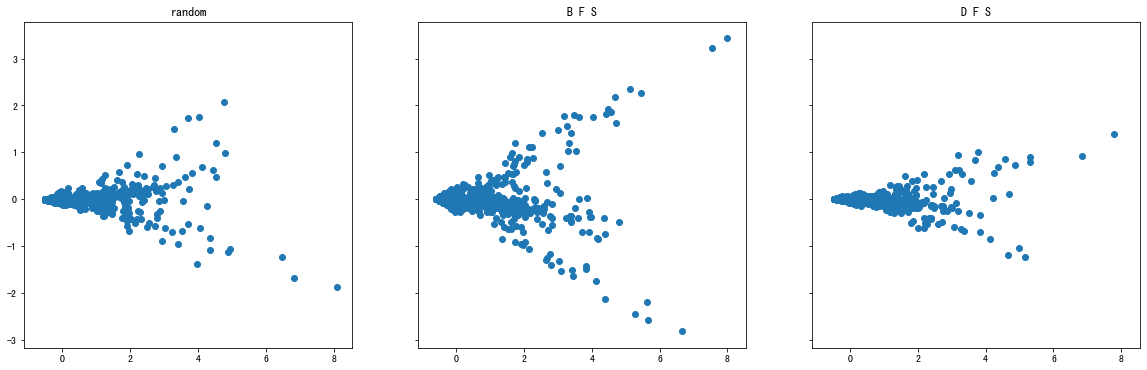

In [95]:
def scatter(result_model):
    # 创建embedding矩阵
    embeddings = result_model.wv
    word_list = list(result_model.wv.vocab.keys())
    matrix = np.array([embeddings[x] for x in word_list])

    # 降维处理
    pca = PCA(n_components=2)
    result = pca.fit_transform(matrix)
    return result

s_random = scatter(result_random)
s_BFS = scatter(result_BFS)
s_DFS = scatter(result_DFS)


# 可视化处理
fig, ax = plt.subplots(1, 3, figsize=(20, 6), sharey=True, sharex=True)
ax[0].scatter(s_random[:,0], s_random[:,1])
ax[0].set_title('random')
ax[1].scatter(s_BFS[:,0], s_BFS[:,1])
ax[1].set_title('B F S')
ax[2].scatter(s_DFS[:,0], s_DFS[:,1])
ax[2].set_title('D F S')
plt.show()